<a href="https://colab.research.google.com/github/allen44/riiid-test-answer-prediction/blob/main/eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



In [3]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/riiid-test-answer-prediction/data/train.csv', index_col='row_id', nrows=10**6)

In [22]:
info_fullset = df.info()
info_fullset

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000000 entries, 0 to 999999
Data columns (total 9 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   timestamp                       1000000 non-null  int64  
 1   user_id                         1000000 non-null  int64  
 2   content_id                      1000000 non-null  int64  
 3   content_type_id                 1000000 non-null  int64  
 4   task_container_id               1000000 non-null  int64  
 5   user_answer                     1000000 non-null  int64  
 6   answered_correctly              1000000 non-null  int64  
 7   prior_question_elapsed_time     976277 non-null   float64
 8   prior_question_had_explanation  996184 non-null   object 
dtypes: float64(1), int64(7), object(1)
memory usage: 76.3+ MB


In [5]:
df.head()

,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation
row_id,,,,,,,,,
0,0,115,5692,0,1,3,1,NaN,NaN
1,56943,115,5716,0,2,2,1,37000.0,False
2,118363,115,128,0,0,0,1,55000.0,False
3,131167,115,7860,0,3,0,1,19000.0,False
4,137965,115,7922,0,4,1,1,11000.0,False


In [6]:
df.shape

(1000000, 9)

In [23]:
describe_fullset = df.describe(include='all')
describe_fullset

,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation
count,1.000000e+06,1.000000e+06,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,976277.000000,996184
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,889887
mean,7.344311e+09,1.017255e+07,5232.691523,0.019907,806.105689,1.374784,0.617504,25302.962693,NaN
std,1.058693e+10,6.029234e+06,3882.323419,0.139681,1025.887530,1.194168,0.525364,19710.310227,NaN
min,0.000000e+00,1.150000e+02,0.000000,0.000000,0.000000,-1.000000,-1.000000,0.000000,NaN
25%,5.211669e+08,4.702585e+06,2057.000000,0.000000,109.000000,0.000000,0.000000,16000.000000,NaN
50%,2.824811e+09,9.678259e+06,5052.000000,0.000000,391.000000,1.000000,1.000000,21000.000000,NaN
75%,1.010186e+10,1.556872e+07,7421.000000,0.000000,1112.000000,3.000000,1.000000,29666.000000,NaN


# Exploring the data in each column

From the Kaggle website:


row_id: (int64) ID code for the row.

timestamp: (int64) the time in milliseconds between this user interaction and the first event completion from that user.

user_id: (int32) ID code for the user.

content_id: (int16) ID code for the user interaction

content_type_id: (int8) 0 if the event was a question being posed to the user, 1 if the event was the user watching a lecture.

task_container_id: (int16) Id code for the batch of questions or lectures. For example, a user might see three questions in a row before seeing the explanations for any of them. Those three would all share a task_container_id.

user_answer: (int8) the user's answer to the question, if any. Read -1 as null, for lectures.

answered_correctly: (int8) if the user responded correctly. Read -1 as null, for lectures.

prior_question_elapsed_time: (float32) The average time in milliseconds it took a user to answer each question in the previous question bundle, ignoring any lectures in between. Is null for a user's first question bundle or lecture. Note that the time is the average time a user took to solve each question in the previous bundle.

prior_question_had_explanation: (bool) Whether or not the user saw an explanation and the correct response(s) after answering the previous question bundle, ignoring any lectures in between. The value is shared across a single question bundle, and is null for a user's first question bundle or lecture. Typically the first several questions a user sees were part of an onboarding diagnostic test where they did not get any feedback.





##timestamp

Presumably, this column has something to do with time, but need not be a time series. Let plot to see the distribution of the data, along with summary statistics.

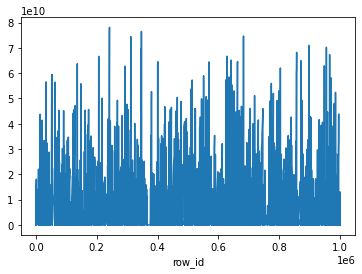

In [8]:
df['timestamp'].plot()
plt.show()

A line plot shows no useful info

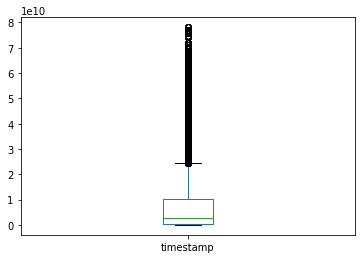

In [9]:
df['timestamp'].plot(kind='box')
plt.show()

A box plot shows that that the timestamps generally have values between 0e9 and 2e9, with a minority of values larger than 2.

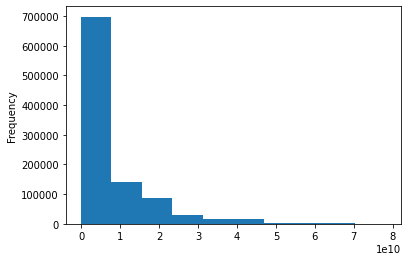

In [10]:
df['timestamp'].plot(kind='hist', bins=10)
plt.show()

There is a right-skewness but no reason yet to consider these as outliers to drop or correct.

##user_id

This is presumed to a unique user id that is randomly distributed to each user, with one per user.

This data can be used to relate data etries from the same users through out the data set.


In [11]:
#Count the unique users in this data set
unique_users = df['user_id'].unique()
unique_users

array([     115,      124,     2746, ..., 20938253, 20948951, 20949024])

unique_users is an np.array of types int, buit is not continuous and very few of the numbers in the range are used.

In [12]:
len(unique_users)

3824

As there are not that many users, while the int range is large, there may be a performance benefit to convert this data type to Category.

In [13]:
df['user_id'] = df['user_id'].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000000 entries, 0 to 999999
Data columns (total 9 columns):
 #   Column                          Non-Null Count    Dtype   
---  ------                          --------------    -----   
 0   timestamp                       1000000 non-null  int64   
 1   user_id                         1000000 non-null  category
 2   content_id                      1000000 non-null  int64   
 3   content_type_id                 1000000 non-null  int64   
 4   task_container_id               1000000 non-null  int64   
 5   user_answer                     1000000 non-null  int64   
 6   answered_correctly              1000000 non-null  int64   
 7   prior_question_elapsed_time     976277 non-null   float64 
 8   prior_question_had_explanation  996184 non-null   object  
dtypes: category(1), float64(1), int64(6), object(1)
memory usage: 70.8+ MB


We can see that the user_id column now has dtype: category.

We can  group the rows by user_id now.

In [14]:
df = df.set_index('user_id', 'timestamp')

#Detour
As the Google Colab runtime keeps crashing due to lack of memory (even with Colab Pro), we will switch to importing only about 1% of the data for this EDA. IF we see that this subset differs signifcant;y fullset's summary statistics, we can contiue to attempt using the full set.

In [17]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/riiid-test-answer-prediction/data/train.csv', index_col='row_id', nrows=10**6)

In [18]:
info_subset = df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000000 entries, 0 to 999999
Data columns (total 9 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   timestamp                       1000000 non-null  int64  
 1   user_id                         1000000 non-null  int64  
 2   content_id                      1000000 non-null  int64  
 3   content_type_id                 1000000 non-null  int64  
 4   task_container_id               1000000 non-null  int64  
 5   user_answer                     1000000 non-null  int64  
 6   answered_correctly              1000000 non-null  int64  
 7   prior_question_elapsed_time     976277 non-null   float64
 8   prior_question_had_explanation  996184 non-null   object 
dtypes: float64(1), int64(7), object(1)
memory usage: 76.3+ MB


In [21]:
describe_subset = df.describe(include='all')
describe_subset

,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation
count,1.000000e+06,1.000000e+06,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,976277.000000,996184
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,889887
mean,7.344311e+09,1.017255e+07,5232.691523,0.019907,806.105689,1.374784,0.617504,25302.962693,NaN
std,1.058693e+10,6.029234e+06,3882.323419,0.139681,1025.887530,1.194168,0.525364,19710.310227,NaN
min,0.000000e+00,1.150000e+02,0.000000,0.000000,0.000000,-1.000000,-1.000000,0.000000,NaN
25%,5.211669e+08,4.702585e+06,2057.000000,0.000000,109.000000,0.000000,0.000000,16000.000000,NaN
50%,2.824811e+09,9.678259e+06,5052.000000,0.000000,391.000000,1.000000,1.000000,21000.000000,NaN
75%,1.010186e+10,1.556872e+07,7421.000000,0.000000,1112.000000,3.000000,1.000000,29666.000000,NaN


##content_id
content_id: (int16) ID code for the user interaction

We can probably recast this as categorical also.

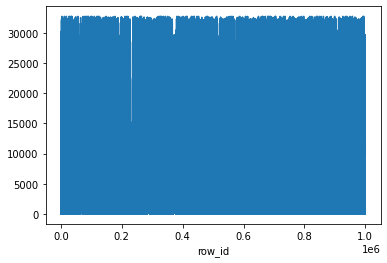

In [26]:
df['content_id'].plot()
plt.show()